In [9]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

%matplotlib inline


We do some basic transformations ...

 - `data.month` is converted into a `np.datetime64` object
 - `data.storey_range` is converted into a number
 - A new category `data.flat` is created that combines the `data.flat_model` and `adta.flat_type`s

In [28]:
fileName = '../data/relaseData.csv'
data = pd.read_csv(fileName)

data.month = data.month.astype(np.datetime64)
data.storey_range = data.storey_range.map( lambda m: np.mean(map(float, m.replace('TO', '').split())) )
data['flat'] = data.flat_type + '--' + data.flat_model

In [29]:
data.head().T

0  \
month                                 2012-03-01 00:00:00   
town                                           ANG MO KIO   
flat_type                                          2 ROOM   
block                                                 172   
street_name                              ANG MO KIO AVE 4   
storey_range                                            8   
floor_area_sqm                                         45   
flat_model                                       Improved   
lease_commence_date                                  1986   
resale_price                                       250000   
address              Blk 172, ANG MO KIO AVE 4, Singapore   
flat                                     2 ROOM--Improved   

                                                        1  \
month                                 2012-03-01 00:00:00   
town                                           ANG MO KIO   
flat_type                                          2 ROOM   
block                                                 510   
street_name                              ANG MO KIO AVE 8   
storey_range                                            3   
floor_area_sqm                                         44   
flat_model                                       Improved   
lease_commence_date                                  1980   
resale_price                                       265000   
address              Blk 510, ANG MO KIO AVE 8, Singapore   
flat                                     2 ROOM--Improved   

                                                        2  \
month                                 2012-03-01 00:00:00   
town                                           ANG MO KIO   
flat_type                                          3 ROOM   
block                                                 610   
street_name                              ANG MO KIO AVE 4   
storey_range                                            8   
floor_area_sqm                                         68   
flat_model                                 New Generation   
lease_commence_date                                  1980   
resale_price                                       315000   
address              Blk 610, ANG MO KIO AVE 4, Singapore   
flat                               3 ROOM--New Generation   

                                                         3  \
month                                  2012-03-01 00:00:00   
town                                            ANG MO KIO   
flat_type                                           3 ROOM   
block                                                  474   
street_name                              ANG MO KIO AVE 10   
storey_range                                             3   
floor_area_sqm                                          67   
flat_model                                  New Generation   
lease_commence_date                                   1984   
resale_price                                        320000   
address              Blk 474, ANG MO KIO AVE 10, Singapore   
flat                                3 ROOM--New Generation   

                                                        4  
month                                 2012-03-01 00:00:00  
town                                           ANG MO KIO  
flat_type                                          3 ROOM  
block                                                 604  
street_name                              ANG MO KIO AVE 5  
storey_range                                            8  
floor_area_sqm                                         67  
flat_model                                 New Generation  
lease_commence_date                                  1980  
resale_price                                       321000  
address              Blk 604, ANG MO KIO AVE 5, Singapore  
flat                               3 ROOM--New Generation

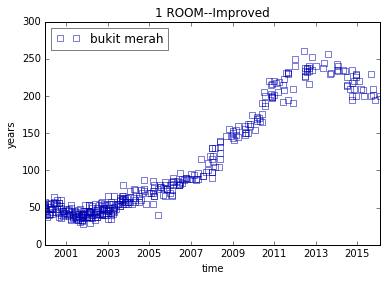

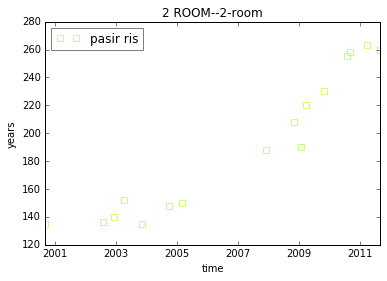

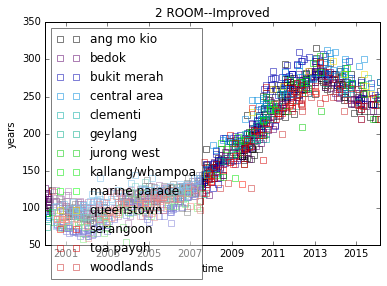

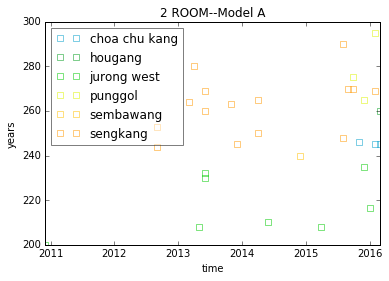

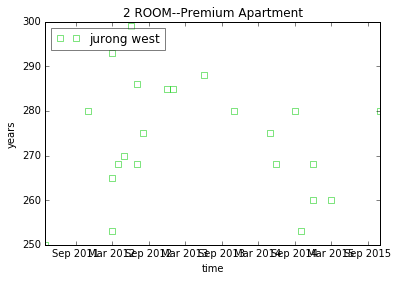

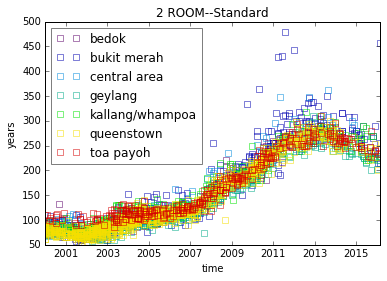

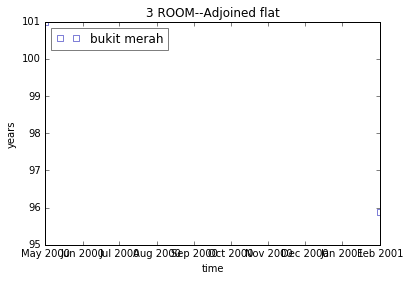

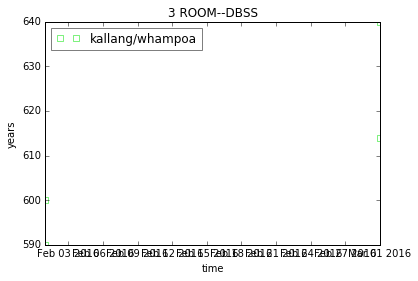

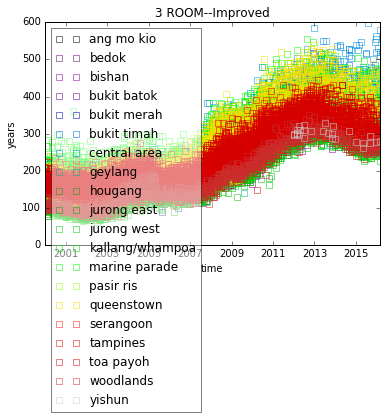

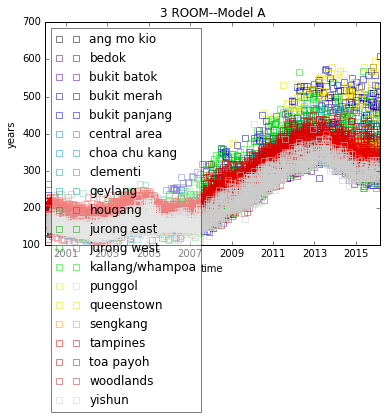

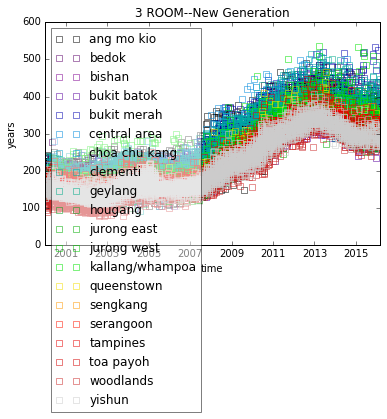

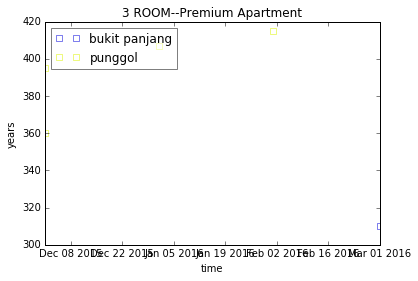

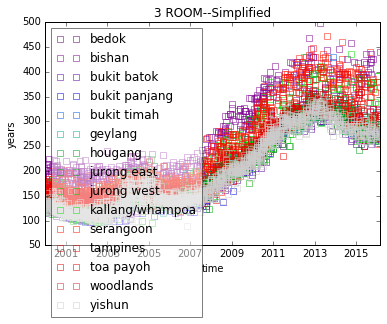

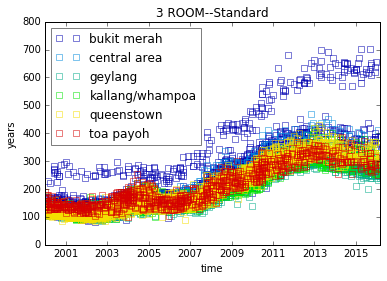

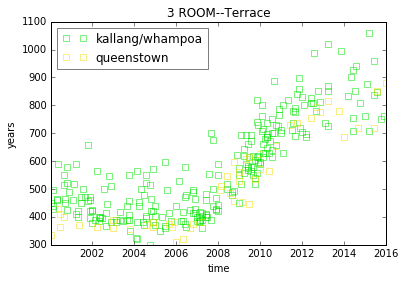

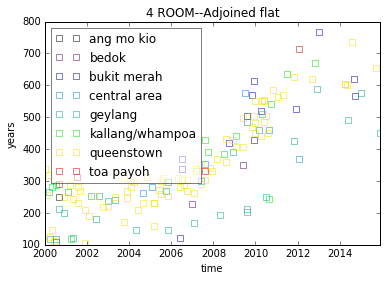

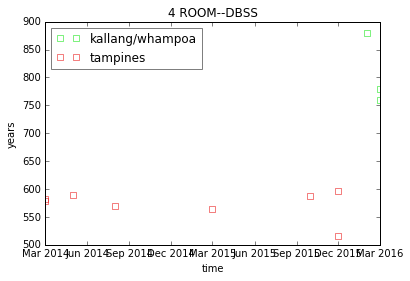

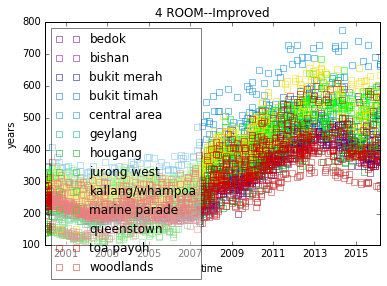

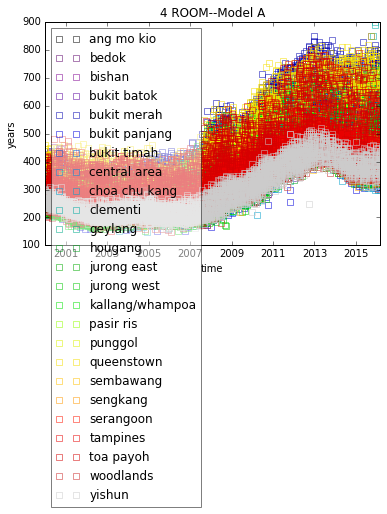

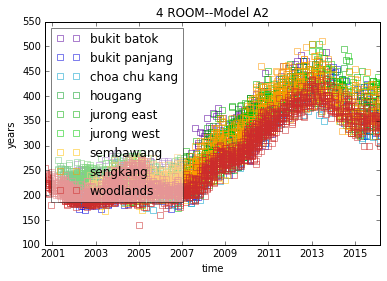

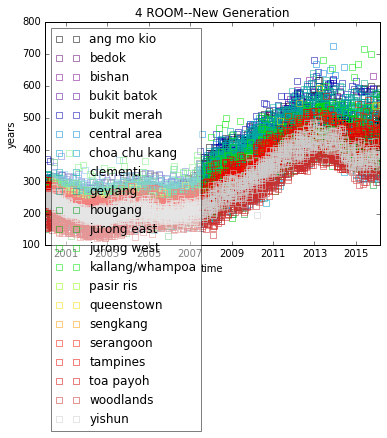

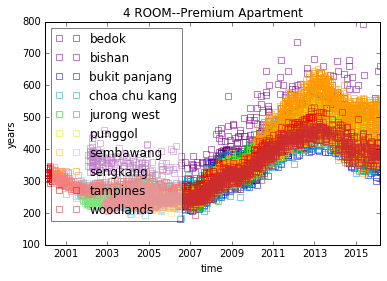

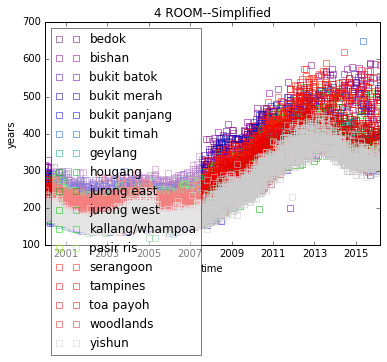

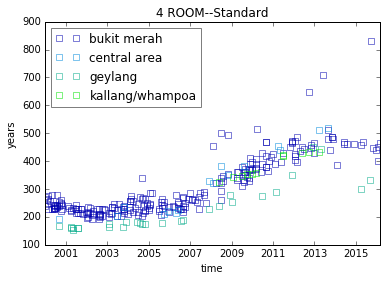

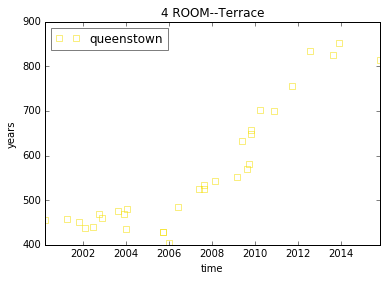

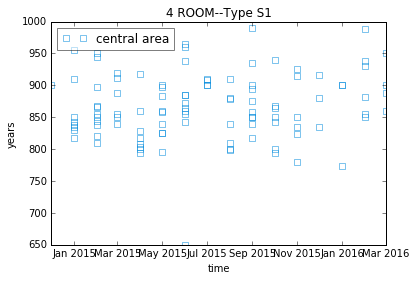

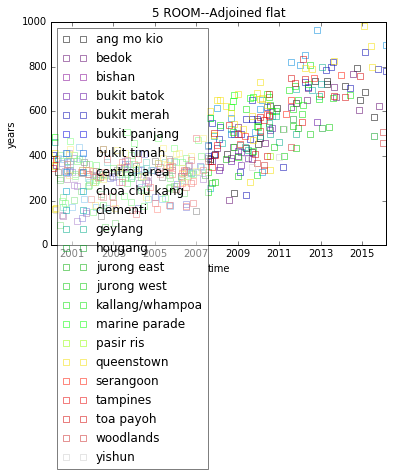

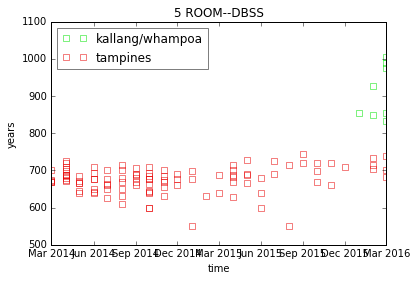

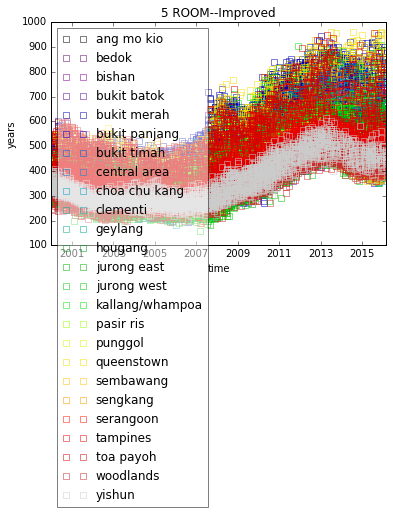

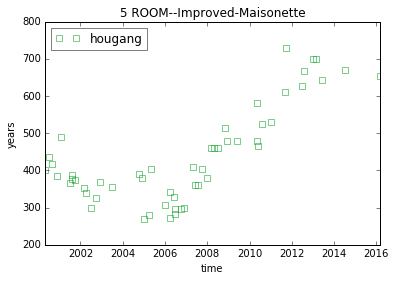

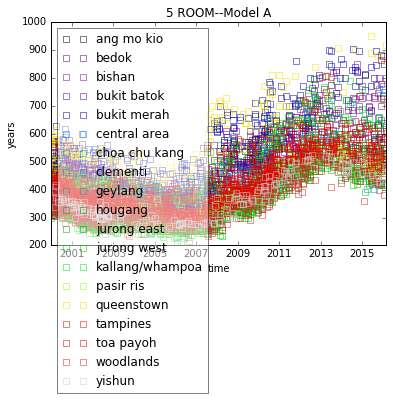

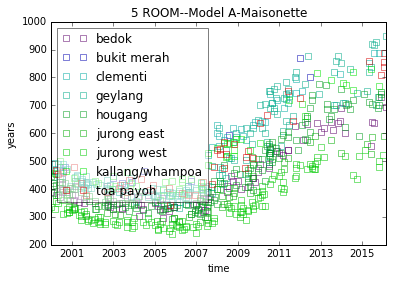

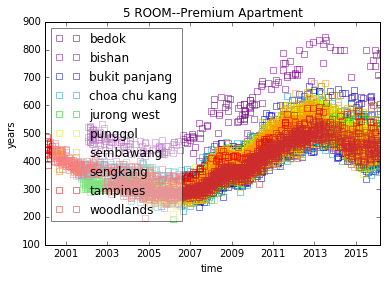

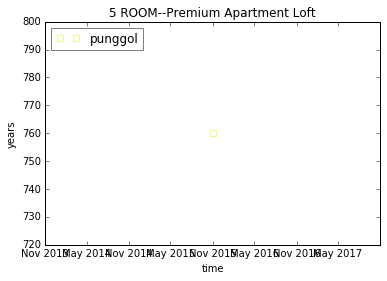

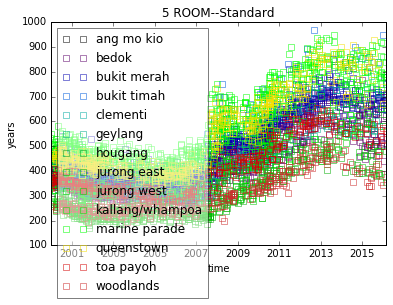

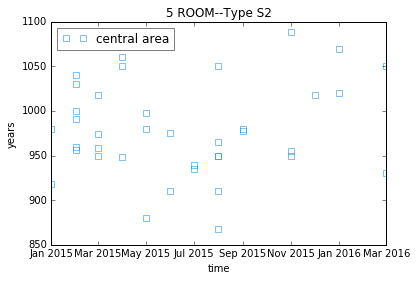

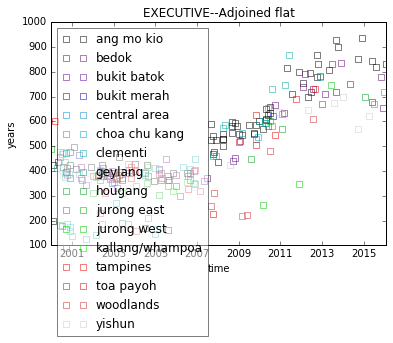

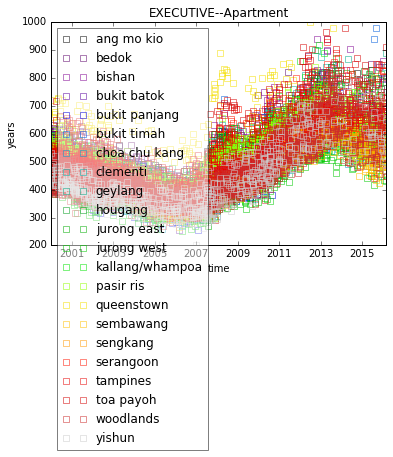

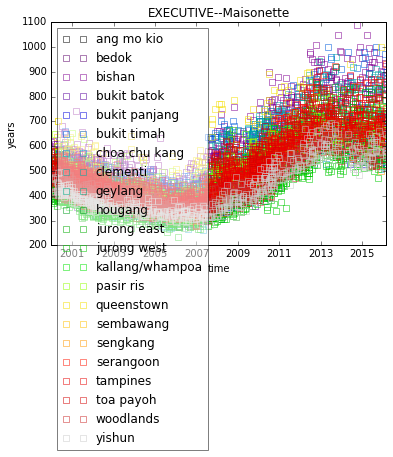

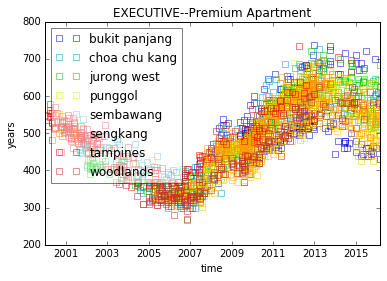

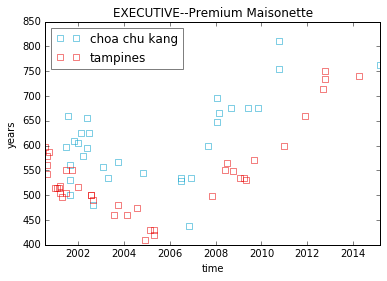

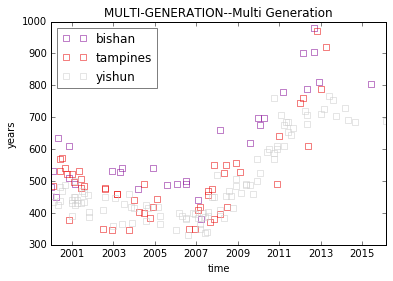

In [24]:
towns = list(data.town.unique())
townColors = dict([ (t, plt.cm.spectral(  float(i)/(len(towns)-1) )   )   for i, t in enumerate(towns) ])


for flat, dfFlat in data.groupby('flat'):
    plt.figure()
    for town, dfTown in dfFlat.groupby('town'):
        plt.plot( dfTown.month, dfTown.resale_price/1000.0, 
                 's', 
                 label=town.lower(), 
                 mec=townColors[town], mfc='None')
    
    plt.title(flat)
    plt.legend(loc='upper left', framealpha=0.5, scatterpoints=1)
    plt.xlabel('time')
    plt.ylabel('years')
    
plt.show()

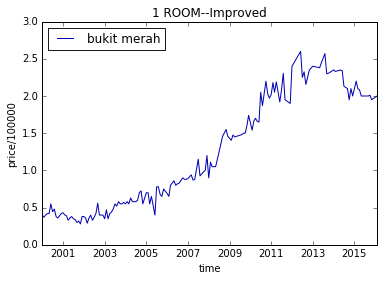

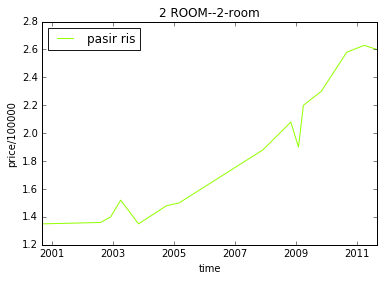

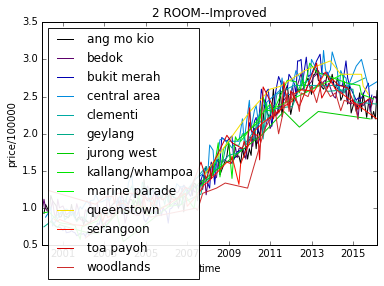

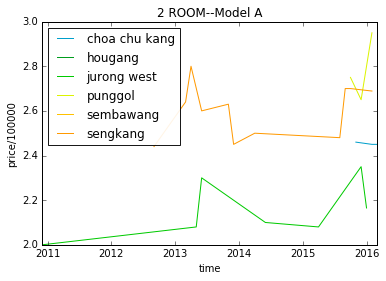

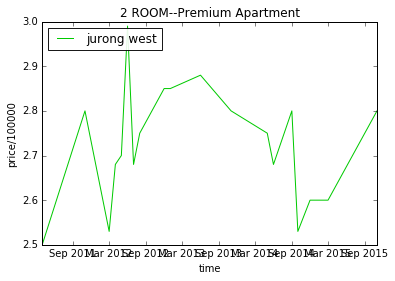

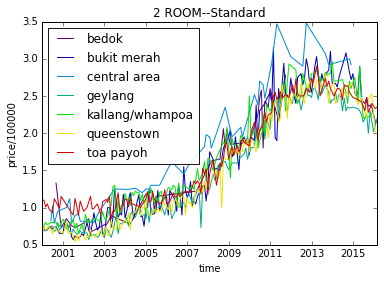

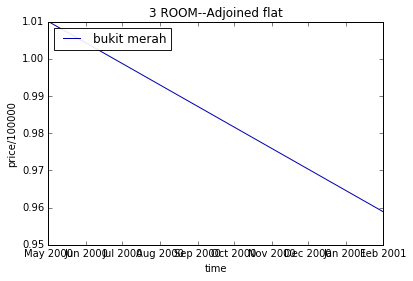

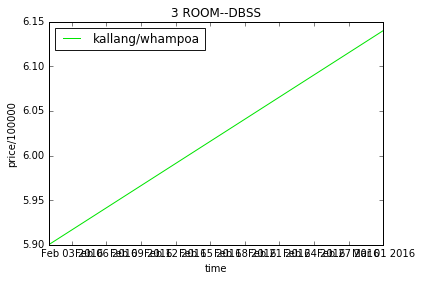

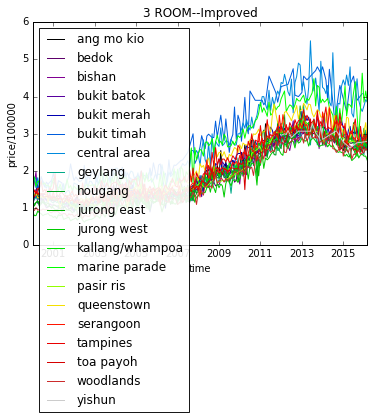

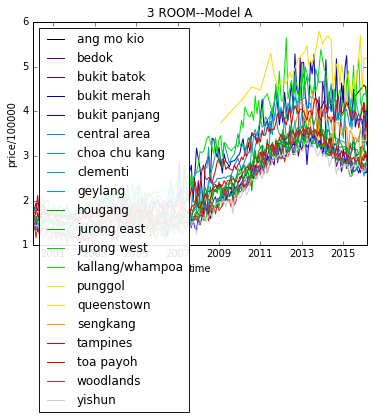

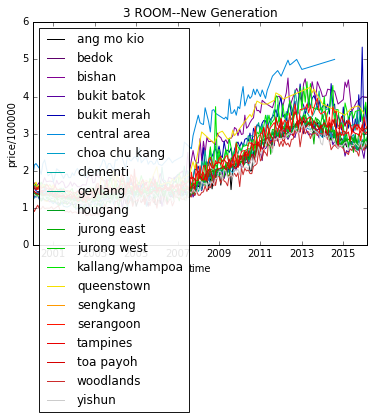

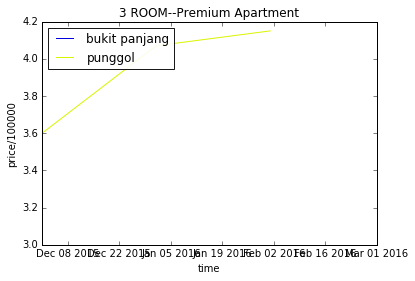

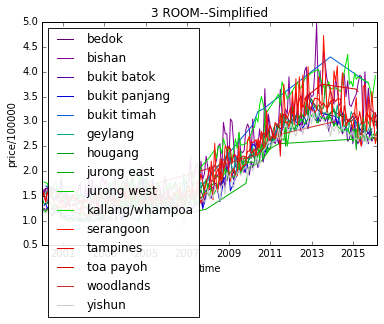

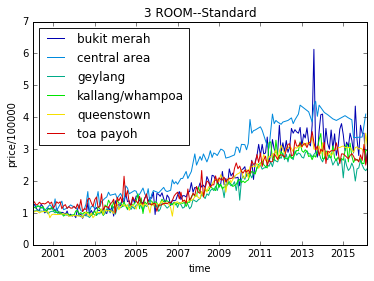

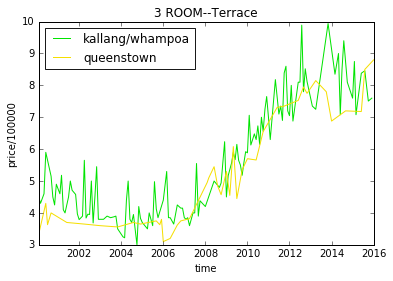

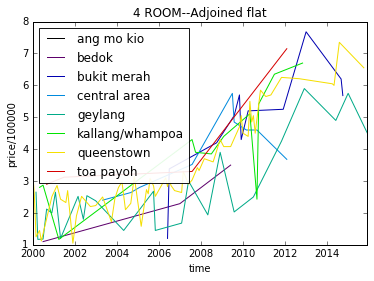

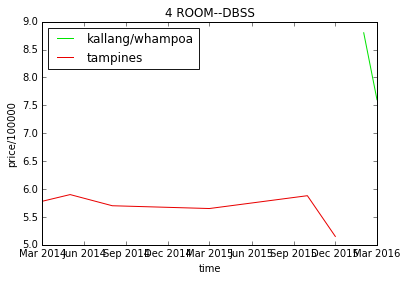

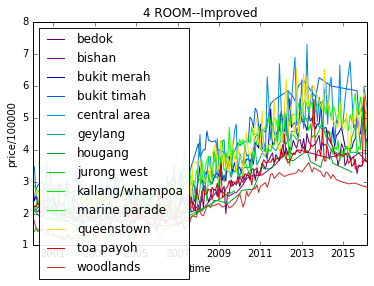

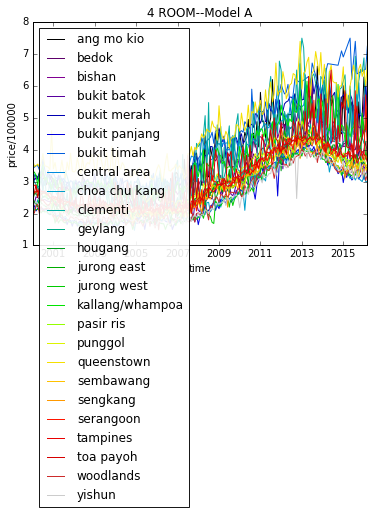

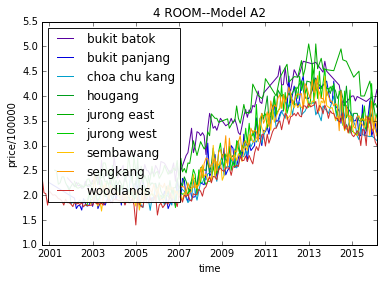

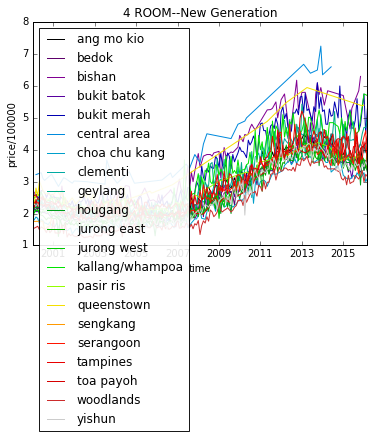

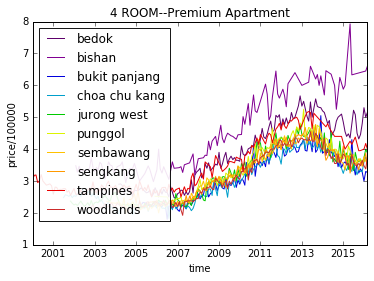

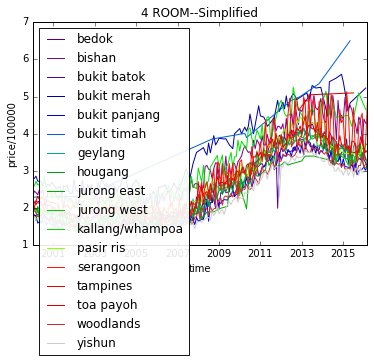

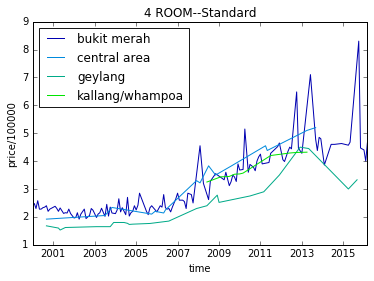

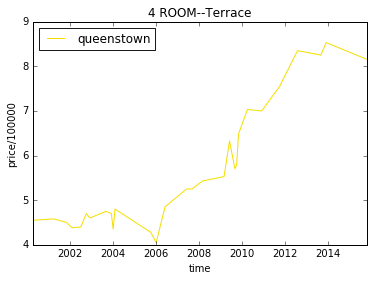

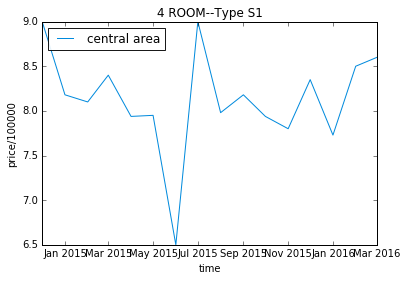

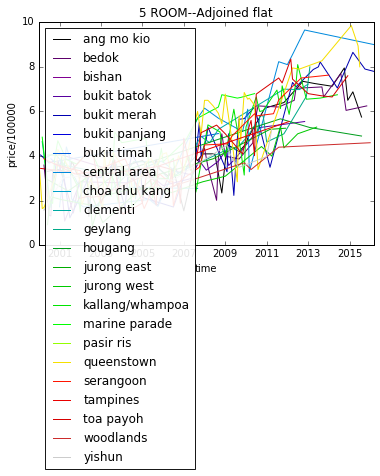

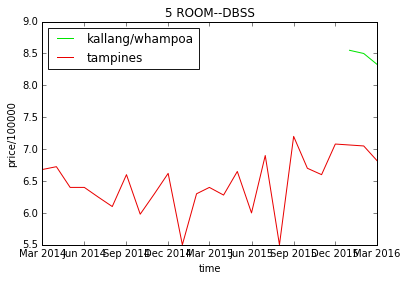

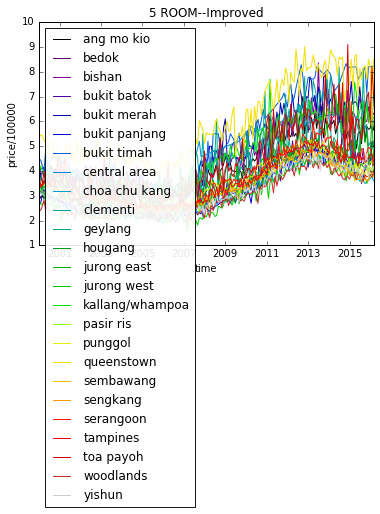

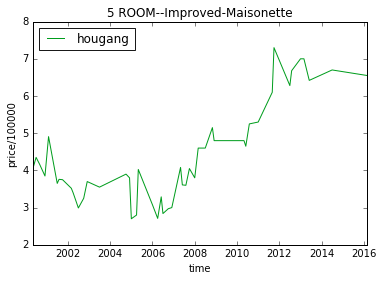

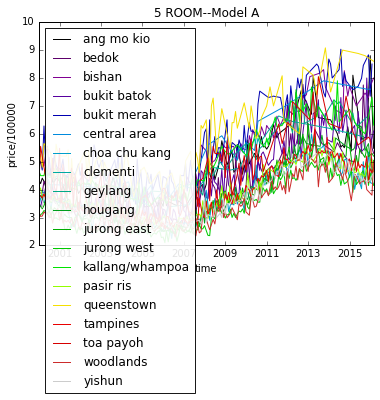

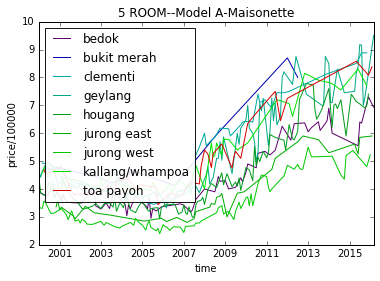

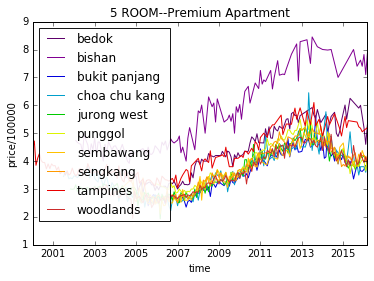

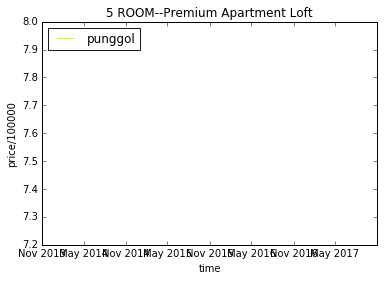

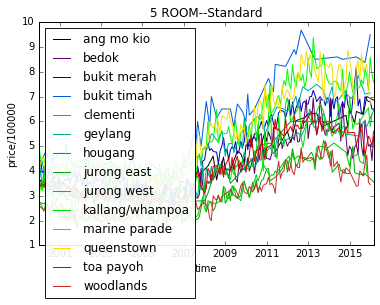

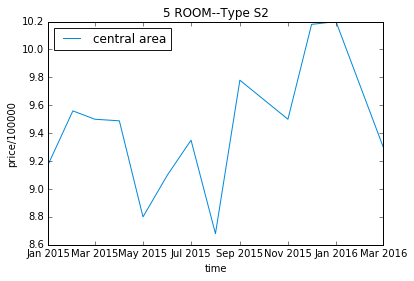

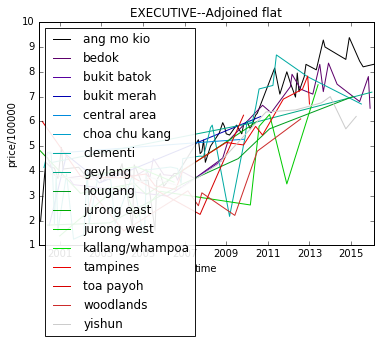

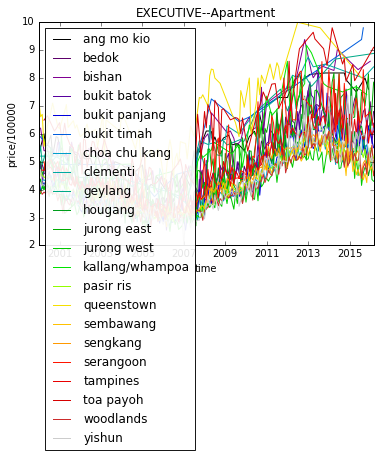

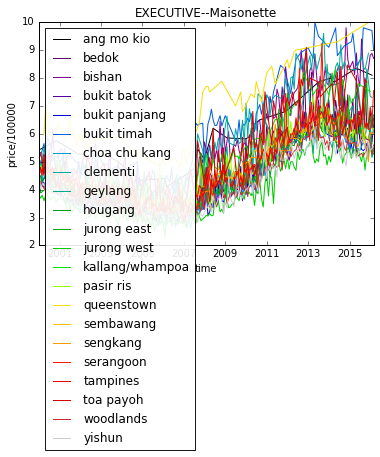

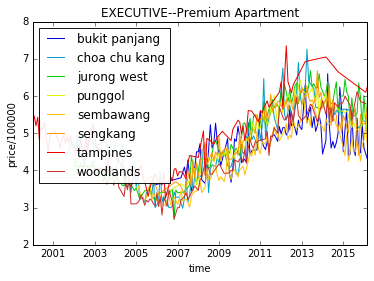

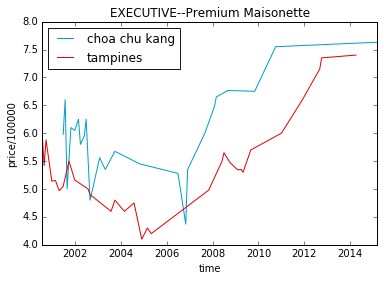

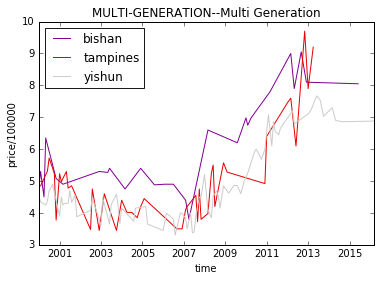

In [39]:
towns = list(data.town.unique())
townColors = dict([ (t, plt.cm.spectral(  float(i)/(len(towns)-1) )   )   for i, t in enumerate(towns) ])


for flat, dfFlat in data.groupby('flat'):
    plt.figure()
    for town, dfTown in dfFlat.groupby('town'):
        data1 = dfTown[['month', 'resale_price']].groupby('month').agg(np.min).reset_index()
        plt.plot(data1.month, data1.resale_price/100000,
                label=town.lower(),
                 color=townColors[town])
    
    plt.title(flat)
    plt.legend(loc='upper left', framealpha=0.9, scatterpoints=1)
    plt.xlabel('time')
    plt.ylabel('price/100000')
    plt.savefig('pictures/%s[with legend]-minPrices.png'%flat)
    
plt.show()

In [76]:
data1 = data.ix[  data.month == data.month.max() , ['month', 'flat', 'town', 'resale_price']]
data2 = data1[['flat', 'town', 'resale_price']].groupby(['flat', 'town']).agg(np.median).reset_index()


In [79]:
data1 = data.ix[  data.month == data.month.max() , ['month', 'flat', 'town', 'resale_price']]
data2 = data1[['flat', 'town', 'resale_price']].groupby(['flat', 'town']).agg(np.min).reset_index()



/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


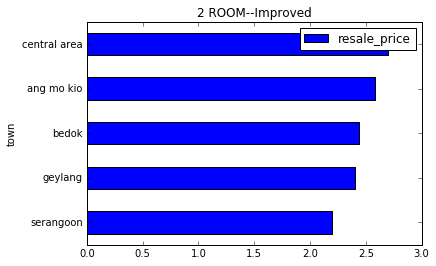

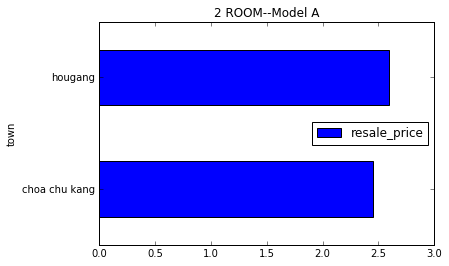

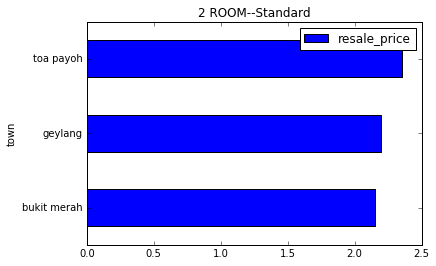

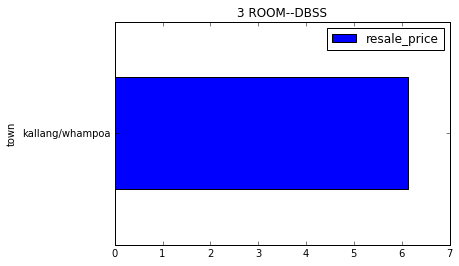

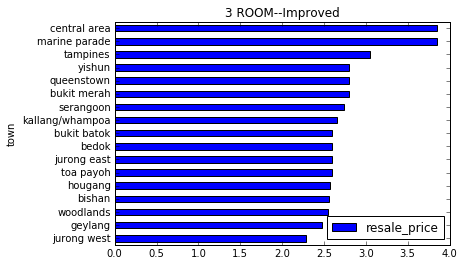

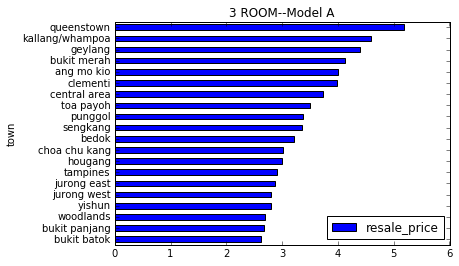

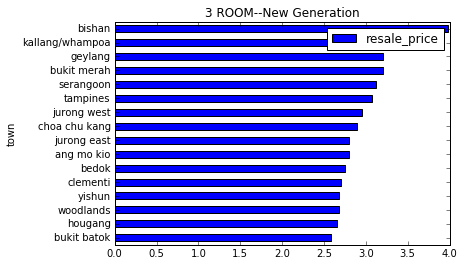

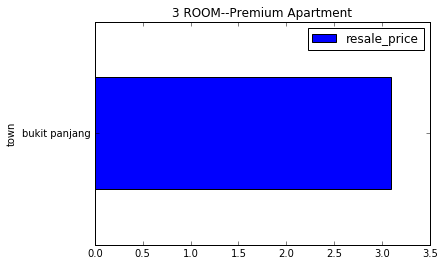

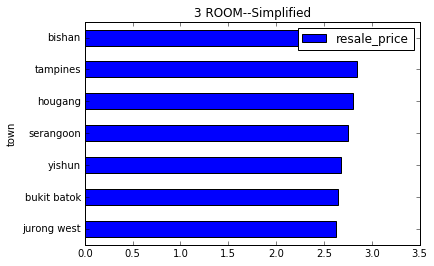

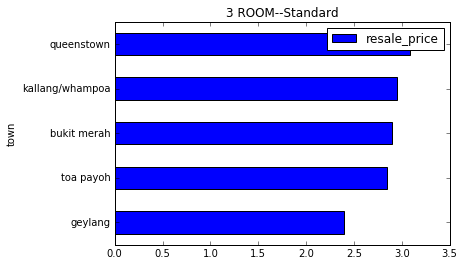

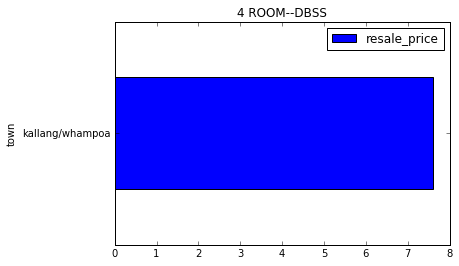

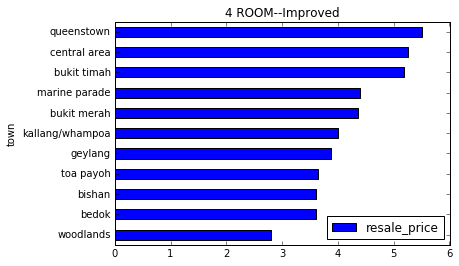

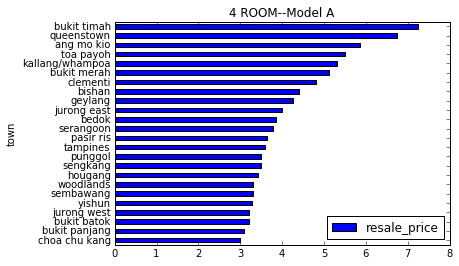

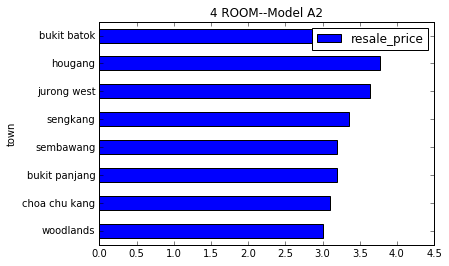

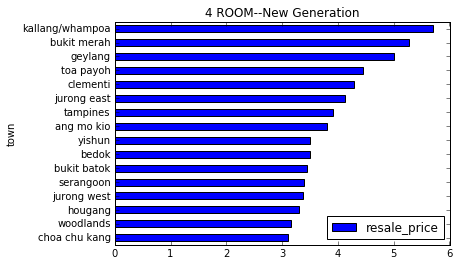

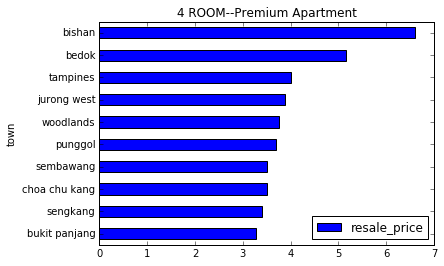

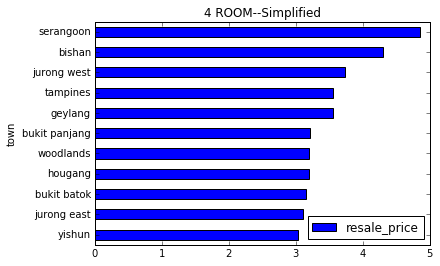

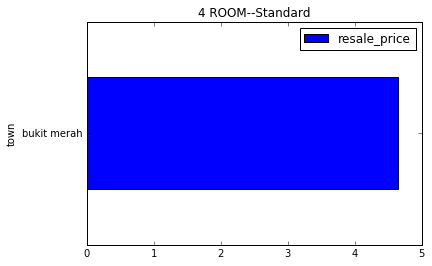

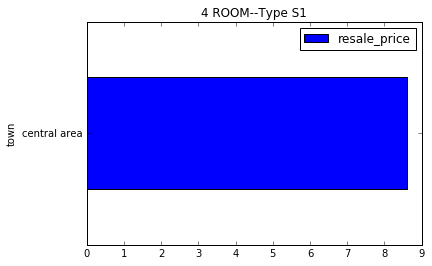

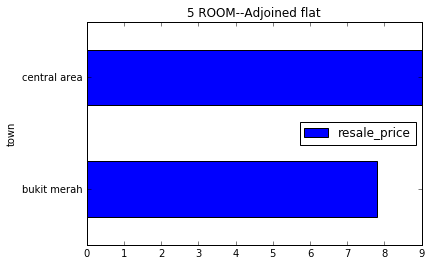

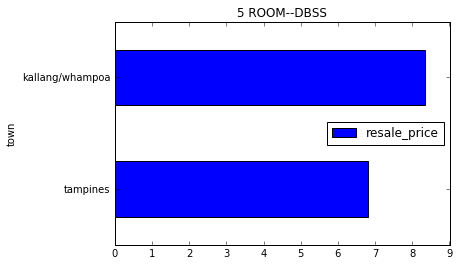

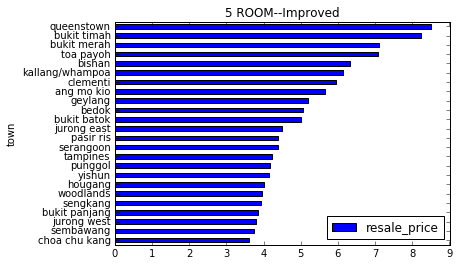

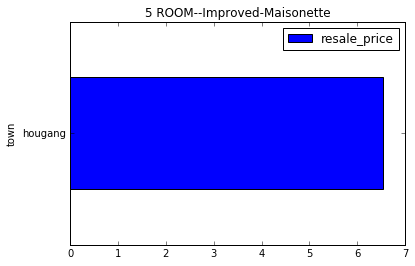

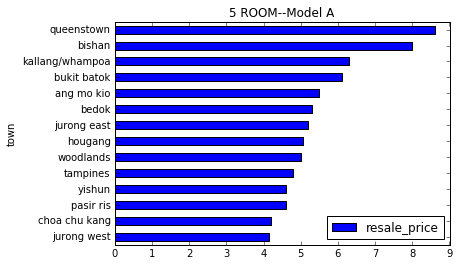

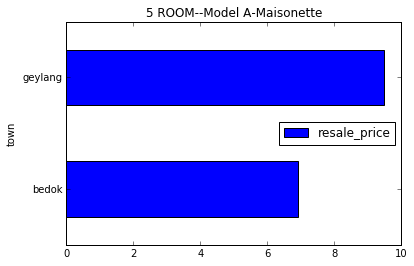

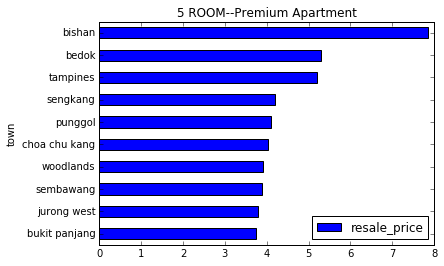

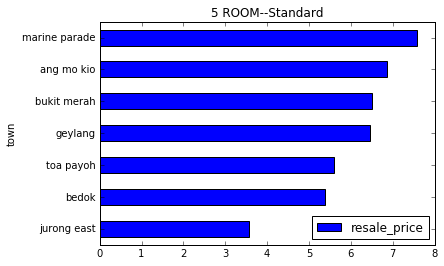

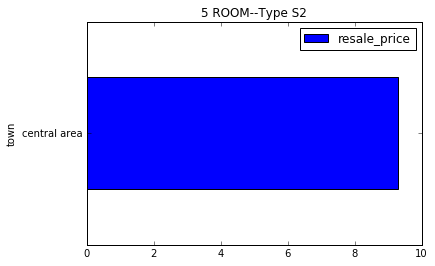

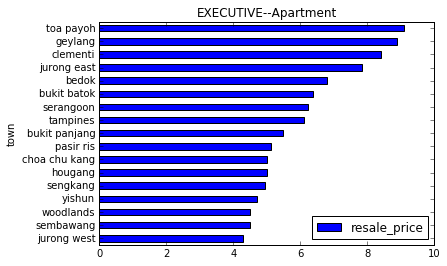

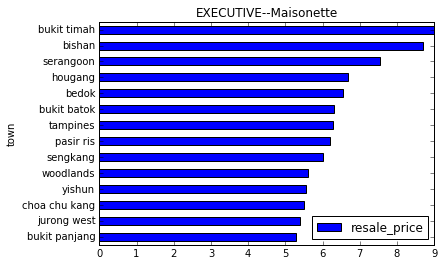

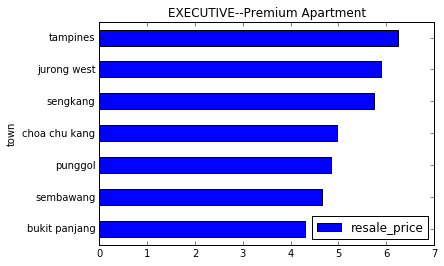

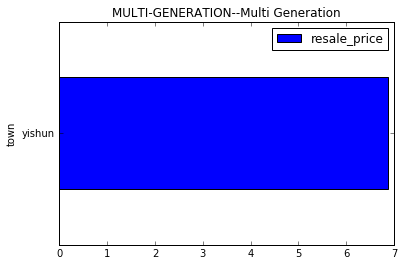

In [80]:
for flat, dfFlat in data2.groupby('flat'):
    dfFlat.sort('resale_price', inplace=True)
    plt.figure()
    dfFlat.resale_price = dfFlat.resale_price/100000 
    dfFlat.plot.barh(x = dfFlat.town.map(lambda m: m.lower()))
    plt.title(flat)
    
    

In [72]:
dfFlat.sort(['resale_price'])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


flat    town  resale_price
261  MULTI-GENERATION--Multi Generation  YISHUN          6.88